## Demo Model

#### Alvee Hoque 

Creating the model for analyzing past fantasy stats to predict last 16 games. Used this [Machine Learning Mastery]('https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/') to model the approach for this problem. 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings
import timeit

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style('white')
sns.set(rc={'figure.figsize':(30,16)})

In [3]:
# ML Imports 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from math import sqrt

In [4]:
# reading data 
qb = pd.read_csv('fantasy_data/qb_fantasy.csv')
rb = pd.read_csv('fantasy_data/rb_fantasy.csv')
wr = pd.read_csv('fantasy_data/wr_fantasy.csv')
te = pd.read_csv('fantasy_data/te_fantasy.csv')

In [5]:
# renaming the player name column 
qb = qb.rename(columns={'Unnamed: 0': 'name'})
rb = rb.rename(columns={'Unnamed: 0': 'name'})
wr = wr.rename(columns={'Unnamed: 0': 'name'})
te = te.rename(columns={'Unnamed: 0': 'name'})

### Task: Demo Run 
1. Select a hall of fame qb to analyze. Tom Brady will be the example here: 

In [6]:
sample_qb = qb[qb.name == input('Enter name here: ')]
sample_qb = sample_qb[sample_qb.columns[~sample_qb.isnull().all()]]

Enter name here: Tom Brady


In [7]:
sample_qb

,name,2000_game13,2001_game2,2001_game3,2001_game4,2001_game5,2001_game6,2001_game7,2001_game8,2001_game9,2001_game10,2001_game11,2001_game12,2001_game13,2001_game14,2001_game15,2001_game17,2002_game1,2002_game2,2002_game3,2002_game4,2002_game5,2002_game6,2002_game8,2002_game9,2002_game10,2002_game11,2002_game12,2002_game13,2002_game14,2002_game15,2002_game16,2002_game17,2003_game1,2003_game2,2003_game3,2003_game4,2003_game5,2003_game6,2003_game7,2003_game8,2003_game9,2003_game11,2003_game12,2003_game13,2003_game14,2003_game15,2003_game16,2003_game17,2004_game1,2004_game2,2004_game4,2004_game5,2004_game6,2004_game7,2004_game8,2004_game9,2004_game10,2004_game11,2004_game12,2004_game13,2004_game14,2004_game15,2004_game16,2004_game17,2005_game1,2005_game2,2005_game3,2005_game4,2005_game5,2005_game6,2005_game8,2005_game9,2005_game10,2005_game11,2005_game12,2005_game13,2005_game14,2005_game15,2005_game16,2005_game17,2006_game1,2006_game2,2006_game3,2006_game4,2006_game5,2006_game7,2006_game8,2006_game9,2006_game10,2006_game11,2006_game12,2006_game13,2006_game14,2006_game15,2006_game16,2006_game17,2007_game1,2007_game2,2007_game3,2007_game4,2007_game5,2007_game6,2007_game7,2007_game8,2007_game9,2007_game11,2007_game12,2007_game13,2007_game14,2007_game15,2007_game16,2007_game17,2008_game1,2009_game1,2009_game2,2009_game3,2009_game4,2009_game5,2009_game6,2009_game7,2009_game9,2009_game10,2009_game11,2009_game12,2009_game13,2009_game14,2009_game15,2009_game16,2009_game17,2010_game1,2010_game2,2010_game3,2010_game4,2010_game6,2010_game7,2010_game8,2010_game9,2010_game10,2010_game11,2010_game12,2010_game13,2010_game14,2010_game15,2010_game16,2010_game17,2011_game1,2011_game2,2011_game3,2011_game4,2011_game5,2011_game6,2011_game8,2011_game9,2011_game10,2011_game11,2011_game12,2011_game13,2011_game14,2011_game15,2011_game16,2011_game17,2012_game1,2012_game2,2012_game3,2012_game4,2012_game5,2012_game6,2012_game7,2012_game8,2012_game10,2012_game11,2012_game12,2012_game13,2012_game14,2012_game15,2012_game16,2012_game17,2013_game1,2013_game2,2013_game3,2013_game4,2013_game5,2013_game6,2013_game7,2013_game8,2013_game9,2013_game11,2013_game12,2013_game13,2013_game14,2013_game15,2013_game16,2013_game17,2014_game1,2014_game2,2014_game3,2014_game4,2014_game5,2014_game6,2014_game7,2014_game8,2014_game9,2014_game11,2014_game12,2014_game13,2014_game14,2014_game15,2014_game16,2014_game17,2015_game1,2015_game2,2015_game3,2015_game5,2015_game6,2015_game7,2015_game8,2015_game9,2015_game10,2015_game11,2015_game12,2015_game13,2015_game14,2015_game15,2015_game16,2015_game17,2016_game5,2016_game6,2016_game7,2016_game8,2016_game10,2016_game11,2016_game12,2016_game13,2016_game14,2016_game15,2016_game16,2016_game17,2017_game1,2017_game2,2017_game3,2017_game4,2017_game5,2017_game6,2017_game7,2017_game8,2017_game10,2017_game11,2017_game12,2017_game13,2017_game14,2017_game15,2017_game16,2017_game17,2018_game1,2018_game2,2018_game3,2018_game4,2018_game5,2018_game6,2018_game7,2018_game8,2018_game9,2018_game10,2018_game12,2018_game13,2018_game14,2018_game15,2018_game16,2018_game17,2019_game1,2019_game2,2019_game3,2019_game4,2019_game5,2019_game6,2019_game7,2019_game8,2019_game9,2019_game11,2019_game12,2019_game13,2019_game14,2019_game15,2019_game16,2019_game17,2020_game1,2020_game2,2020_game3,2020_game4,2020_game5,2020_game6,2020_game7,2020_game8,2020_game9,2020_game10,2020_game11,2020_game12,2020_game14,2020_game15,2020_game16,2020_game17
310,Tom Brady,0.24,2.74,6.92,4.34,22.56,19.88,8.02,22.0,4.18,8.0,27.72,8.52,4.42,8.78,10.62,8.12,23.76,17.26,30.6,18.42,11.6,5.92,9.7,22.5,22.72,4.98,21.96,7.6,14.82,10.36,9.72,9.64,-3.08,22.9,11.14,13.76,12.96,4.48,18.32,10.16,21.9,8.78,18.22,13.34,6.32,17.82,13.62,24.46,23.3,11.06,20.12,8.94,9.94,12.9,12.84,15.46,15.52,16.5,7.18,9.28,18.6,10.64,18.86,13.34,20.14,10.8,12.88,11.36,24.1,17.16,10.36,22.5,14.9,19.38,7.42,12.74,24.86,22.92,14.1,3.68,10.82,8.7,17.5,15.62,13.3,16.0,28.98,1.34,12.12,24.36,11.88,11.1,1.12,12.56,17.06,12.9,2

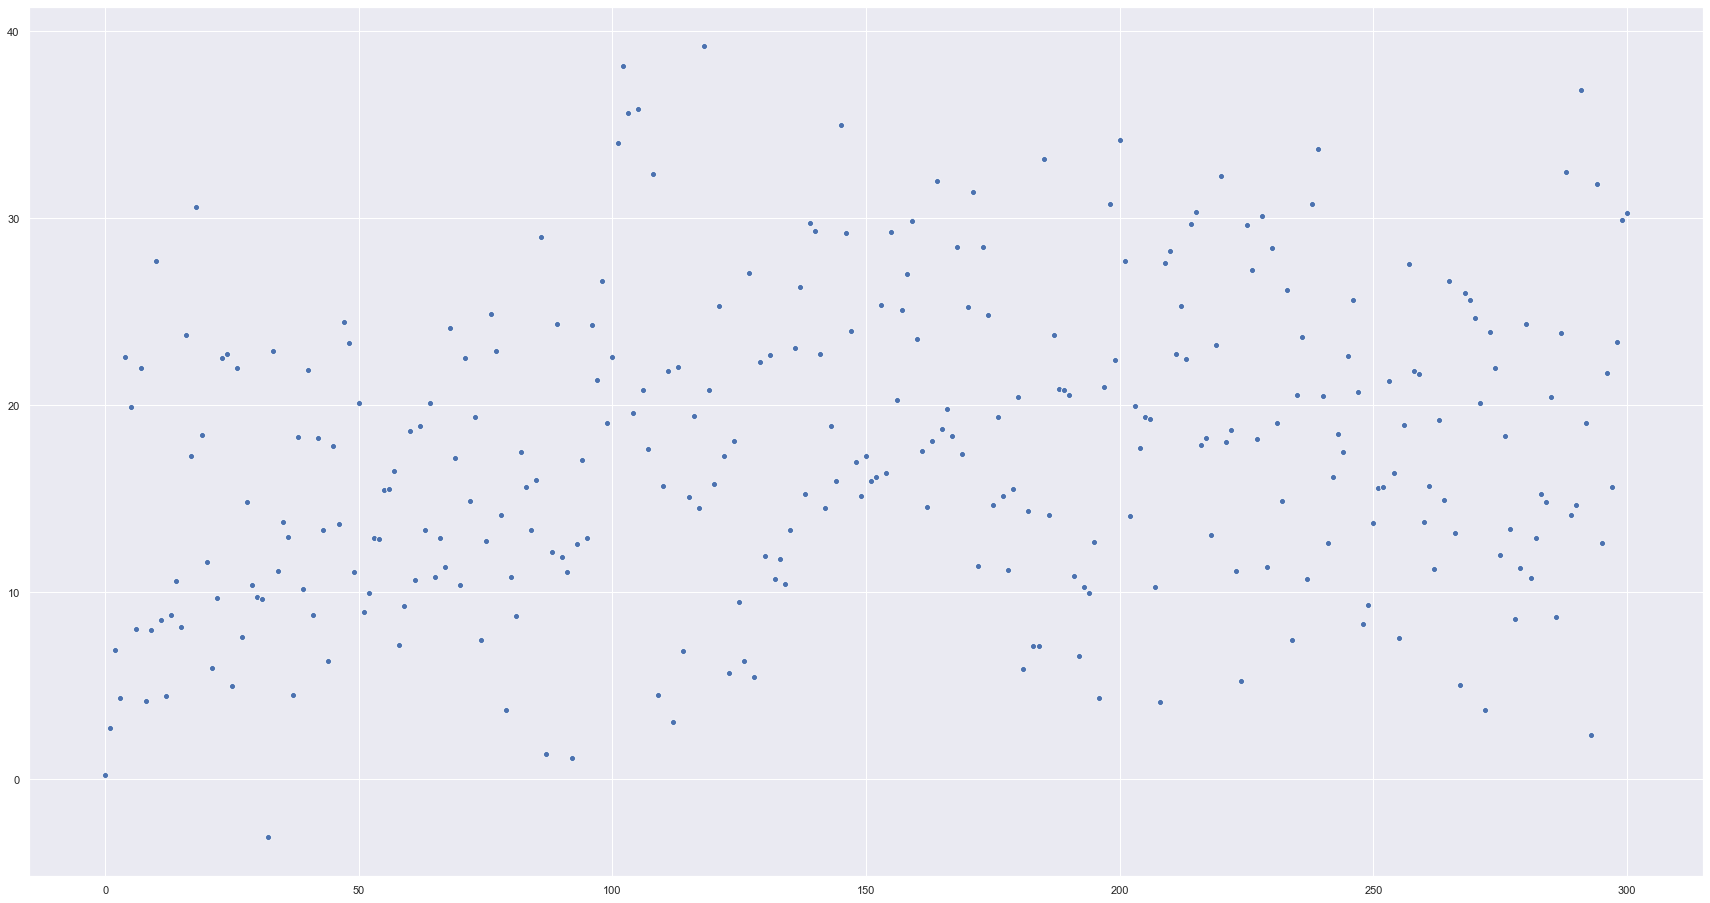

In [9]:
# Plot all of his scores
sns.scatterplot(x = np.arange(0,len(sample_qb.values[0][1:].tolist())), 
                 y = sample_qb.values[0][1:].tolist())


#### Turn into Supervised Learning Problem

In [13]:
def series_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    
    # input value is previous game and output value is the next game
    columns = [df.shift(i) for i in range (1, lag+1)]
        
    columns.append(df)
    df = pd.concat(columns, axis=1)
    
    #any missing rows will be filled with 0 
    df.fillna(0, inplace=True)

    df.columns = ['X', 'y']
    return df 


In [14]:
X = sample_qb.values[0][1:]
df = series_to_supervised(X)
df.head()


,X,y
0,0.00,0.24
1,0.24,2.74
2,2.74,6.92
3,6.92,4.34
4,4.34,22.56


In [15]:
df.describe()

,X,y
count,301.000000,301.000000
mean,17.435880,17.536412
std,8.105421,8.076047
min,-3.080000,-3.080000
25%,11.300000,11.340000
50%,17.300000,17.380000
75%,22.720000,22.760000
max,39.200000,39.200000


#### No Time Lag 

In [16]:
time = list(range(0,len(df+1)))
fantasy_points = list(df.y.values)
df_2 = pd.DataFrame({'time': time, 'y': fantasy_points})

#### Train Test Split


In [17]:
# X = sample_qb.values[0][1:]
# X = X.reshape(len(X),1)

In [18]:
def ttsplit(dataframe):
    train, test = dataframe[1:-16].values, dataframe[-16:].values
    return train,test

In [19]:
train,test = ttsplit(df_2)

In [20]:
train,test = ttsplit(df)

In [21]:
test

array([[14.84, 20.46],
       [20.46,  8.68],
       [ 8.68, 23.88],
       [23.88, 32.46],
       [32.46, 14.12],
       [14.12, 14.64],
       [14.64, 36.86],
       [36.86, 19.06],
       [19.06,  2.36],
       [ 2.36, 31.84],
       [31.84, 12.64],
       [12.64, 21.7 ],
       [21.7 , 15.64],
       [15.64, 23.4 ],
       [23.4 , 29.92],
       [29.92, 30.26]])

In [22]:
train,test = df[1:-16].values, df[-16:].values

#### Scale

In [23]:
def scale(train,test):
    #fit scaler 
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaler = scaler.fit(train)
    
    #transform 
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    
    return scaler, train_scaled, test_scaled

In [24]:
scaler, train_scaled, test_scaled = scale(train,test)

#### Model 

In [27]:
def fit_lstm(train, batch_size, num_epoch, neurons):
    X,y = train[:,0:-1], train[:,-1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    for i in range(num_epoch):
        model.fit(X,y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model

In [28]:
rnn = fit_lstm(train_scaled, 1, 400, 8)

284/284 [==============================] - 0s 1ms/sample - loss: 0.1253


284/284 [==============================] - 0s 1ms/sample - loss: 0.1216


284/284 [==============================] - 0s 1ms/sample - loss: 0.1180


284/284 [==============================] - 0s 1ms/sample - loss: 0.1162


#### Predictions

In [29]:
def forecast_lstm(model, batch_size, X): 
    X = X.reshape(1,1,len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [30]:
def invert_scale(scaler, X, value): 
    new_row = [x for x in X] + [value]
    vals = np.array(new_row)
    vals = vals.reshape(1, len(vals))
    inverted = scaler.inverse_transform(vals)
    
    return inverted[0,-1]

In [35]:
preds = []
inv_scaled_preds = []
for i in range(len(test_scaled)):
    X, y = test_scaled[i, 0:-1], test_scaled[i, 1]
    
    yhat = forecast_lstm(rnn, 1, X)
    preds.append(yhat)
#     print(yhat)
    # Inverse scale
    yhat = invert_scale(scaler, X, yhat)
#     print(yhat)
    inv_scaled_preds.append(yhat)

print('Prediction Values:',preds)
inv_scaled_preds

Prediction Values: [0.1135523, 0.073988035, 0.057121128, 0.10872843, 0.070492916, 0.121195324, 0.08230092, 0.12183628, 0.11996938, 0.12896097, 0.29723936, 0.10675992, 0.10209802, 0.096770875, 0.068954356, 0.034299582]


[20.460495666861533,
 19.624107066690918,
 19.26754064261913,
 20.358519034832714,
 19.550220240205523,
 20.622069144397972,
 19.7998413708806,
 20.63561900809407,
 20.596152754127978,
 20.786234843730924,
 24.34364013791084,
 20.316904723942276,
 20.21835209906101,
 20.105736300796266,
 19.51769508615136,
 18.785093168616292]

In [72]:
print('RNN with Time Lag')
inv_scaled_preds

RNN with Time Lag


[15.958566841781137,
 17.86225874394178,
 15.321356890797613,
 17.32447320953011,
 25.571771759986873,
 11.551577785611151,
 15.882588187754152,
 23.87751903057098,
 17.21069218724966,
 16.581042961925267,
 19.819935106188055,
 17.092816972881554,
 17.470918148010966,
 17.523552157878875,
 17.81826815098524,
 24.05870994746685]

In [36]:
# these were original prodections 
original_pred = [15.958566841781137,
 17.86225874394178,
 15.321356890797613,
 17.32447320953011,
 25.571771759986873,
 11.551577785611151,
 15.882588187754152,
 23.87751903057098,
 17.21069218724966,
 16.581042961925267,
 19.819935106188055,
 17.092816972881554,
 17.470918148010966,
 17.523552157878875,
 17.81826815098524,
 24.05870994746685]

In [37]:
test1_inv = inv_scaled_preds
test_vals = test[:,1].tolist()
games = list(range(1,17))

In [40]:
validation_df = pd.DataFrame({'games': games,
                              'actual':test_vals,
                              'time_lag':original_pred,
                              'no_lag': inv_scaled_preds})

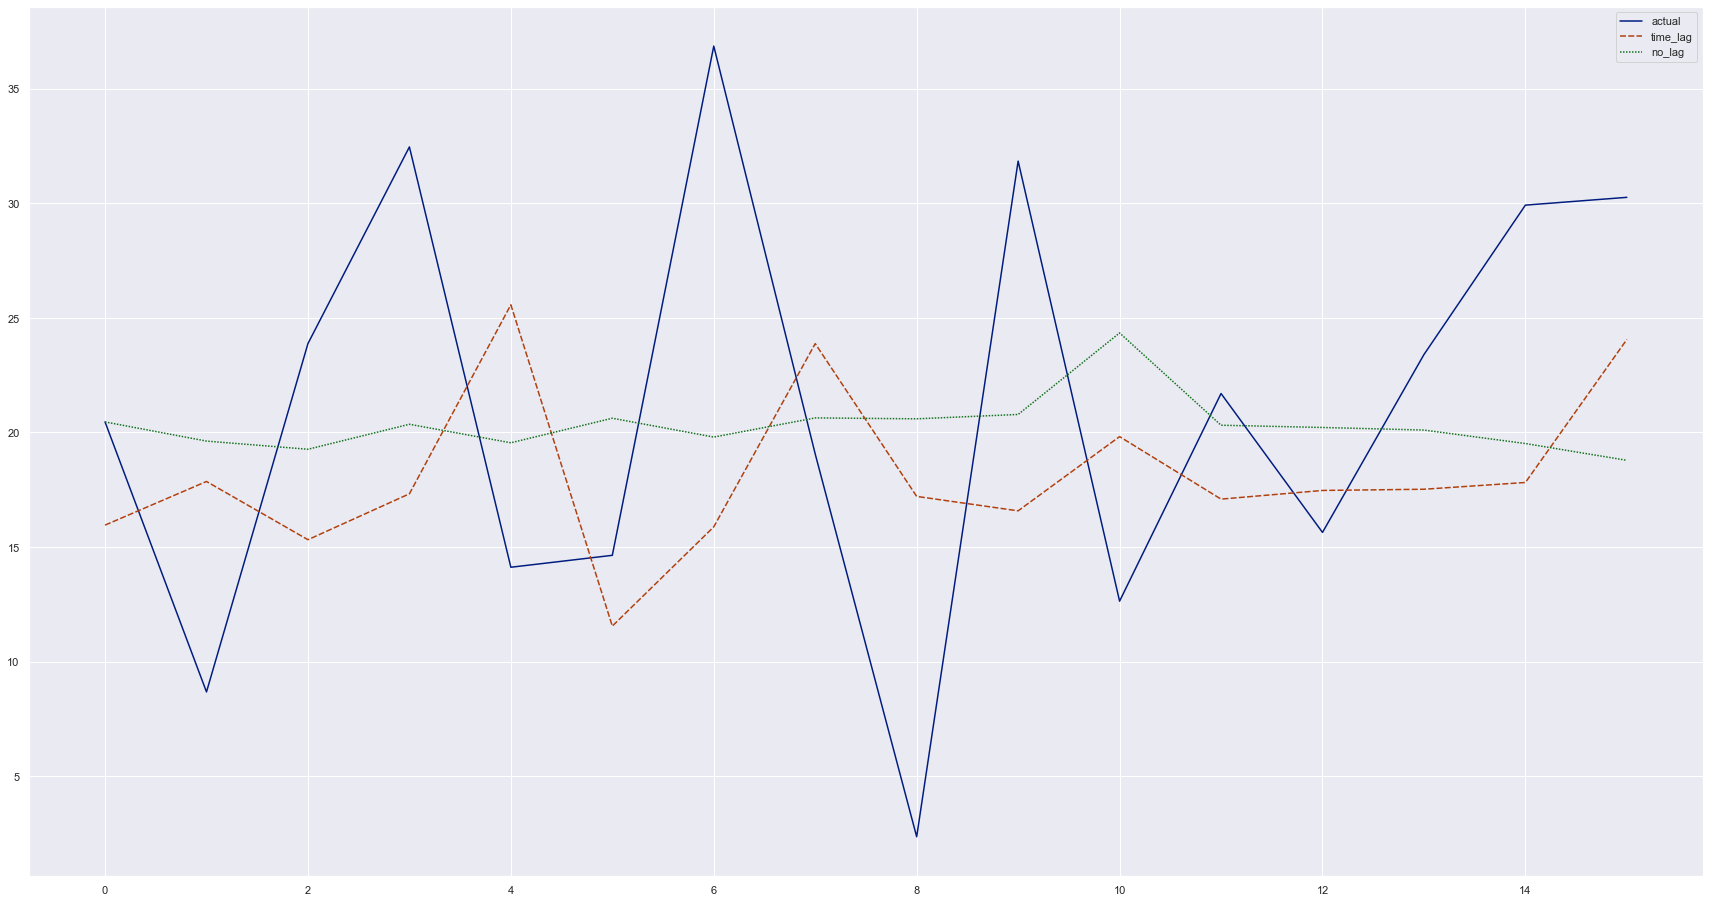

In [41]:
sns.lineplot(data=validation_df[['actual', 'time_lag', 'no_lag']], 
            palette='dark', )

In [42]:
validation_df[['actual', 'time_lag']]

,actual,time_lag
0,20.46,15.958567
1,8.68,17.862259
2,23.88,15.321357
3,32.46,17.324473
4,14.12,25.571772
5,14.64,11.551578
6,36.86,15.882588
7,19.06,23.877519
8,2.36,17.210692
9,31.84,16.581043


In [43]:
validation_df.sum()

games       136.000000
actual      337.920000
time_lag    290.926048
no_lag      324.988221
dtype: float64

Looks like the No Time Lag was closer to Tom Brady's Prediction. Will try the No Time Lag and run the model on all QB's with more than 40 data points and Skill Position players with more than ~30 data points. 